# Business Problem Overview
In the telecommunications industry, customer retention is crucial due to the high competition and the significant costs associated with acquiring new customers. Customers often switch to different operators that offer better tariffs, improved network coverage, or superior customer service. This phenomenon of customers leaving one company for another is known as "churn."

## Objective: 
The primary objective is to develop a machine learning model that can predict whether a customer will churn in a given month based on historical data. This predictive capability can enable telecom operators to implement proactive strategies to retain customers at higher risk of churning by offering personalized incentives, improving service quality, or addressing specific grievances.

## Business Impact:
By accurately predicting potential churn, the company can reduce customer acquisition costs by retaining existing customers. Increase customer lifetime value through targeted retention strategies. Enhance overall customer satisfaction and loyalty by addressing issues preemptively. Optimize marketing spend by focusing on high-risk customers. Steps to Address the Business Problem

## Understanding the Problem Statement and Business Requirements:
* Define churn in the context of the business. Identify key factors that influence churn.

* Collect historical data on customer behavior, service usage, billing information, customer interactions, and demographic details. Ensure the data includes a target variable indicating whether the customer churned.

* Perform exploratory data analysis to understand the patterns and distributions. Clean the data by handling missing values, outliers, and incorrect entries. Feature engineering to create meaningful variables from the data. Split the data into training and testing sets to evaluate the model's performance.

*  Choose appropriate machine learning algorithms (e.g. decision trees, random forests, Extreme gradient boosting Alogorithom).
* Train the models on the training dataset. Tune the models to find the optimal parameters and model Evaluation.
* Evaluate the models using appropriate metrics i.e. accuracy_score and Select the best-performing model based on the evaluation. 

* Continuously monitor the model's performance and make adjustments as needed. Update the model periodically with new data to adapt to changes in customer behavior and market conditions. By following these steps, the telecom operator can develop a robust mechanism to predict churn and implement effective retention strategies, thereby stabilizing their customer base and enhancing profitability.

## Data understanding, preparation & pre-processing
Here we are going to do the analysis on test dataset to understand its characteristics and prepare it further for analysis or model training.

As part of Data Understanding we will cover below points:

### Descriptive statistics to summarize the data.
Distribution of key variables.
Correlation analysis to understand relationships between variables.
As part of Data Preparation & Pre-processing we will cover below steps:

### Handling outliers if necessary.
Encoding categorical variables.
Feature scaling.

## Import Libraries: 

Import all required liberaries.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import re

## Load Data:

Load data using pd.read_csv() method.

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


## Data Enrichment: 

Transforming Raw Data into Meaningful Insights

In [3]:
ids = ['id','circle_id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

telecom = data[variables].set_index('id')

## Snapshot Analysis: 

Average Statistics for a Rapid Data Overview

In [4]:
telecom.describe()

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
count,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,...,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,109.0,328.139788,322.376363,323.846355,306.451436,310.572674,304.513065,198.874771,197.153383,196.543577,...,85.846074,86.348404,122.171882,128.934444,135.486541,51.773924,51.240204,50.127506,1220.639709,0.101887
std,0.0,404.211068,411.070120,426.181405,465.502866,479.131770,477.936832,316.818355,322.482226,324.089234,...,178.067280,170.297094,554.869965,554.096072,568.310234,212.513909,211.114667,213.101403,952.426321,0.302502
min,109.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.090000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000
25%,109.0,110.000000,100.000000,90.000000,44.780000,42.910000,38.710000,34.860000,32.240000,31.575000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000
50%,109.0,229.000000,220.000000,225.000000,145.280000,141.230000,138.360000,96.480000,91.885000,91.800000,...,8.800000,9.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000
75%,109.0,438.000000,430.000000,436.000000,374.305000,380.045000,370.895000,232.990000,227.630000,229.345000,...,122.070000,122.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000
max,109.0,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,8362.360000,7043.980000,14007.340000,...,4809.360000,3483.170000,45735.400000,28144.120000,30036.060000,10285.900000,7873.550000,11117.610000,4337.000000,1.000000


In [5]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   circle_id          69999 non-null  int64  
 1   total_rech_amt_6   69999 non-null  int64  
 2   total_rech_amt_7   69999 non-null  int64  
 3   total_rech_amt_8   69999 non-null  int64  
 4   total_og_mou_6     69999 non-null  float64
 5   total_og_mou_7     69999 non-null  float64
 6   total_og_mou_8     69999 non-null  float64
 7   offnet_mou_6       67231 non-null  float64
 8   offnet_mou_7       67312 non-null  float64
 9   offnet_mou_8       66296 non-null  float64
 10  arpu_3g_6          17568 non-null  float64
 11  arpu_3g_7          17865 non-null  float64
 12  arpu_3g_8          18417 non-null  float64
 13  arpu_2g_6          17568 non-null  float64
 14  arpu_2g_7          17865 non-null  float64
 15  arpu_2g_8          18417 non-null  float64
 16  vol_3g_mb_6        69999 no

## Detecting Data Gaps: 

Exploring Missing Values in the Dataset

In [6]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

circle_id             0.00
total_rech_amt_6      0.00
total_rech_amt_7      0.00
total_rech_amt_8      0.00
total_og_mou_6        0.00
total_og_mou_7        0.00
total_og_mou_8        0.00
offnet_mou_6          3.95
offnet_mou_7          3.84
offnet_mou_8          5.29
arpu_3g_6            74.90
arpu_3g_7            74.48
arpu_3g_8            73.69
arpu_2g_6            74.90
arpu_2g_7            74.48
arpu_2g_8            73.69
vol_3g_mb_6           0.00
vol_3g_mb_7           0.00
vol_3g_mb_8           0.00
vol_2g_mb_6           0.00
vol_2g_mb_7           0.00
vol_2g_mb_8           0.00
aon                   0.00
churn_probability     0.00
dtype: float64

## Removing Sparse Features: 

Dropping Columns with Over 50% Missing Values

In [7]:
#removing columns which have 50% data missing.
missing_data_percent = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
new_vars = missing_data_percent[missing_data_percent.le(50)].index
telecom = telecom[new_vars]
telecom.shape

(69999, 18)

In [8]:
#dropping irrelevant column
telecom.drop(['circle_id'], axis=1, inplace=True)
telecom.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,
0,77,65,10,81.21,221.68,3.63,32.24,96.68,2.33,0.0,0.00,0.0,0.0,0.00,0.00,1958,0
1,0,145,50,0.00,30.73,31.66,0.00,25.99,30.89,0.0,3.96,0.0,0.0,352.91,0.00,710,0
2,70,120,0,56.49,99.36,0.00,53.99,82.05,0.00,0.0,0.00,0.0,0.0,0.00,0.00,882,0
3,160,240,130,76.03,95.98,53.84,68.76,78.48,50.23,0.0,0.00,0.0,0.0,0.00,0.00,982,0
4,290,136,122,63.26,42.94,15.76,56.99,38.11,9.63,0.0,0.00,0.0,390.8,308.89,213.47,647,0


In [9]:
#checking missing values (in percent)
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

total_rech_amt_6     0.00
total_rech_amt_7     0.00
total_rech_amt_8     0.00
total_og_mou_6       0.00
total_og_mou_7       0.00
total_og_mou_8       0.00
offnet_mou_6         3.95
offnet_mou_7         3.84
offnet_mou_8         5.29
vol_3g_mb_6          0.00
vol_3g_mb_7          0.00
vol_3g_mb_8          0.00
vol_2g_mb_6          0.00
vol_2g_mb_7          0.00
vol_2g_mb_8          0.00
aon                  0.00
churn_probability    0.00
dtype: float64

<b>we still have blank columns with some percent, we can fill it with the mean value of the column</b>

In [10]:
#filling data with mean values
for col in telecom.columns:
    telecom[col].fillna(telecom[col].mean(), inplace=True)

In [11]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

total_rech_amt_6     0.0
total_rech_amt_7     0.0
total_rech_amt_8     0.0
total_og_mou_6       0.0
total_og_mou_7       0.0
total_og_mou_8       0.0
offnet_mou_6         0.0
offnet_mou_7         0.0
offnet_mou_8         0.0
vol_3g_mb_6          0.0
vol_3g_mb_7          0.0
vol_3g_mb_8          0.0
vol_2g_mb_6          0.0
vol_2g_mb_7          0.0
vol_2g_mb_8          0.0
aon                  0.0
churn_probability    0.0
dtype: float64

<b>now we can proceed, as there is no null/blank valules in the dataset.</b>

## Data Dimensions: 

Exploring the Shape of the Dataset

In [12]:
telecom.shape

(69999, 17)

## Exploratory Data Analysis & Preprocessing:

Lets analysing the univariate distributions of each feature.


<Axes: >

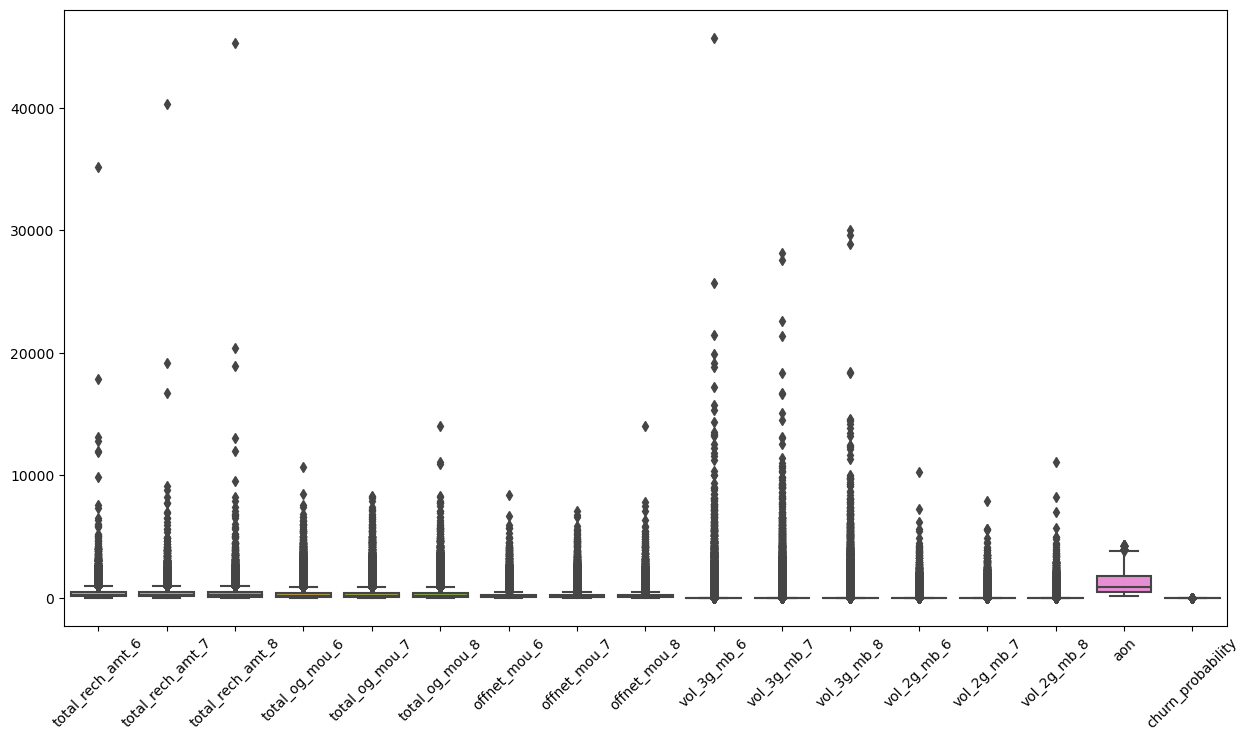

In [13]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = telecom)

## Handling outliers:

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [14]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<Axes: >

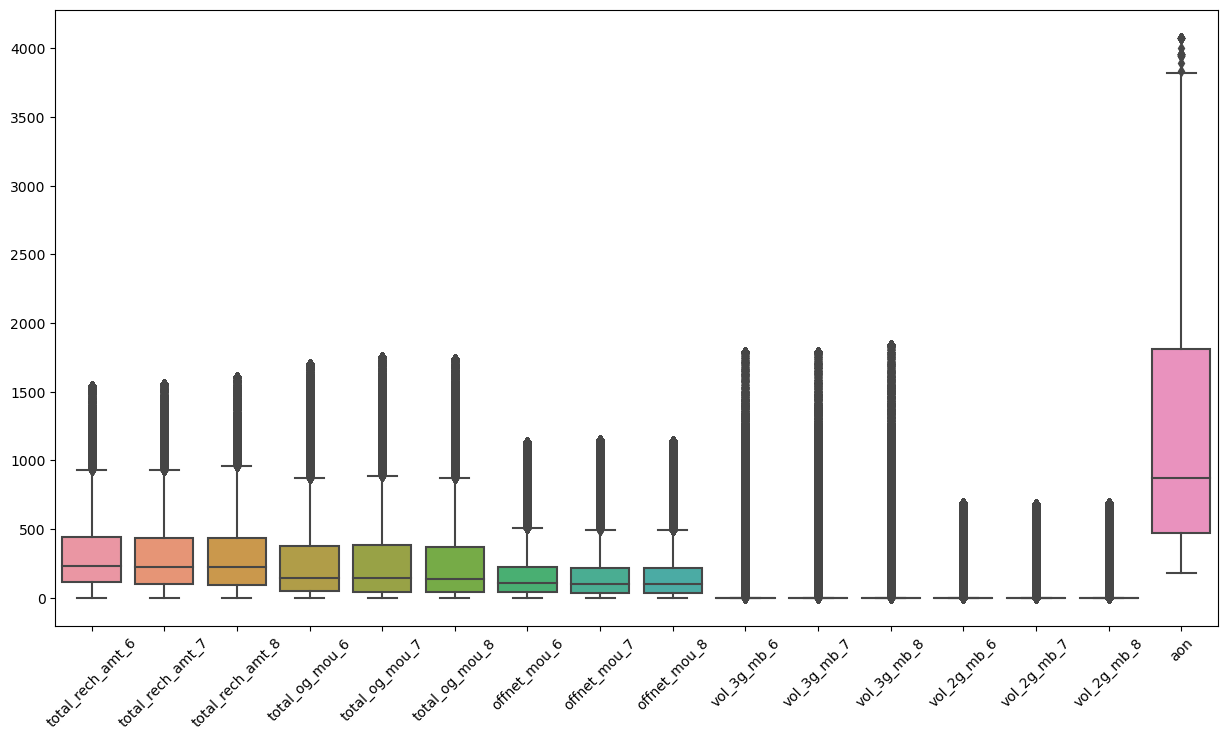

In [15]:
num_vars = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','aon']
X = telecom[num_vars]
y = telecom['churn_probability']
#applying function to handle outliers
X = X.apply(cap_outliers, axis=0)
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)

## Scaling for Normalization: 

Utilizing MinMaxScaler() to Rescale Values within the Range of 0 to 1

In [16]:
#merging outlier handle back to telecom var
telecom[num_vars]=X
telecom.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,
0,77.0,65.0,10.0,81.21,221.68,3.63,32.24,96.68,2.33,0.0,0.00,0.0,0.0,0.00,0.00,1958.0,0
1,0.0,145.0,50.0,0.00,30.73,31.66,0.00,25.99,30.89,0.0,3.96,0.0,0.0,352.91,0.00,710.0,0
2,70.0,120.0,0.0,56.49,99.36,0.00,53.99,82.05,0.00,0.0,0.00,0.0,0.0,0.00,0.00,882.0,0
3,160.0,240.0,130.0,76.03,95.98,53.84,68.76,78.48,50.23,0.0,0.00,0.0,0.0,0.00,0.00,982.0,0
4,290.0,136.0,122.0,63.26,42.94,15.76,56.99,38.11,9.63,0.0,0.00,0.0,390.8,308.89,213.47,647.0,0


In [17]:
#MinMax scaler to scale data
scaler = MinMaxScaler()
telecom[num_vars]=scaler.fit_transform(telecom[num_vars])
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_amt_6,69999.0,0.206826,0.205696,0.0,0.071393,0.148627,0.284273,1.0
total_rech_amt_7,69999.0,0.201211,0.205075,0.0,0.064284,0.141426,0.276423,1.0
total_rech_amt_8,69999.0,0.196422,0.201840,0.0,0.056166,0.140415,0.272093,1.0
total_og_mou_6,69999.0,0.170395,0.221878,0.0,0.026295,0.085310,0.219797,1.0
total_og_mou_7,69999.0,0.168103,0.221681,0.0,0.024549,0.080797,0.217421,1.0
total_og_mou_8,69999.0,0.165682,0.220674,0.0,0.022269,0.079594,0.213364,1.0
offnet_mou_6,69999.0,0.165004,0.208789,0.0,0.032627,0.091857,0.197762,1.0
offnet_mou_7,69999.0,0.161164,0.208960,0.0,0.029655,0.086032,0.190557,1.0
offnet_mou_8,69999.0,0.161484,0.206907,0.0,0.030094,0.088979,0.189377,1.0
vol_3g_mb_6,69999.0,0.056169,0.181062,0.0,0.000000,0.000000,0.000000,1.0


## Visualizing Relationships: 

Utilizing Heatmaps to Display Variable Correlations

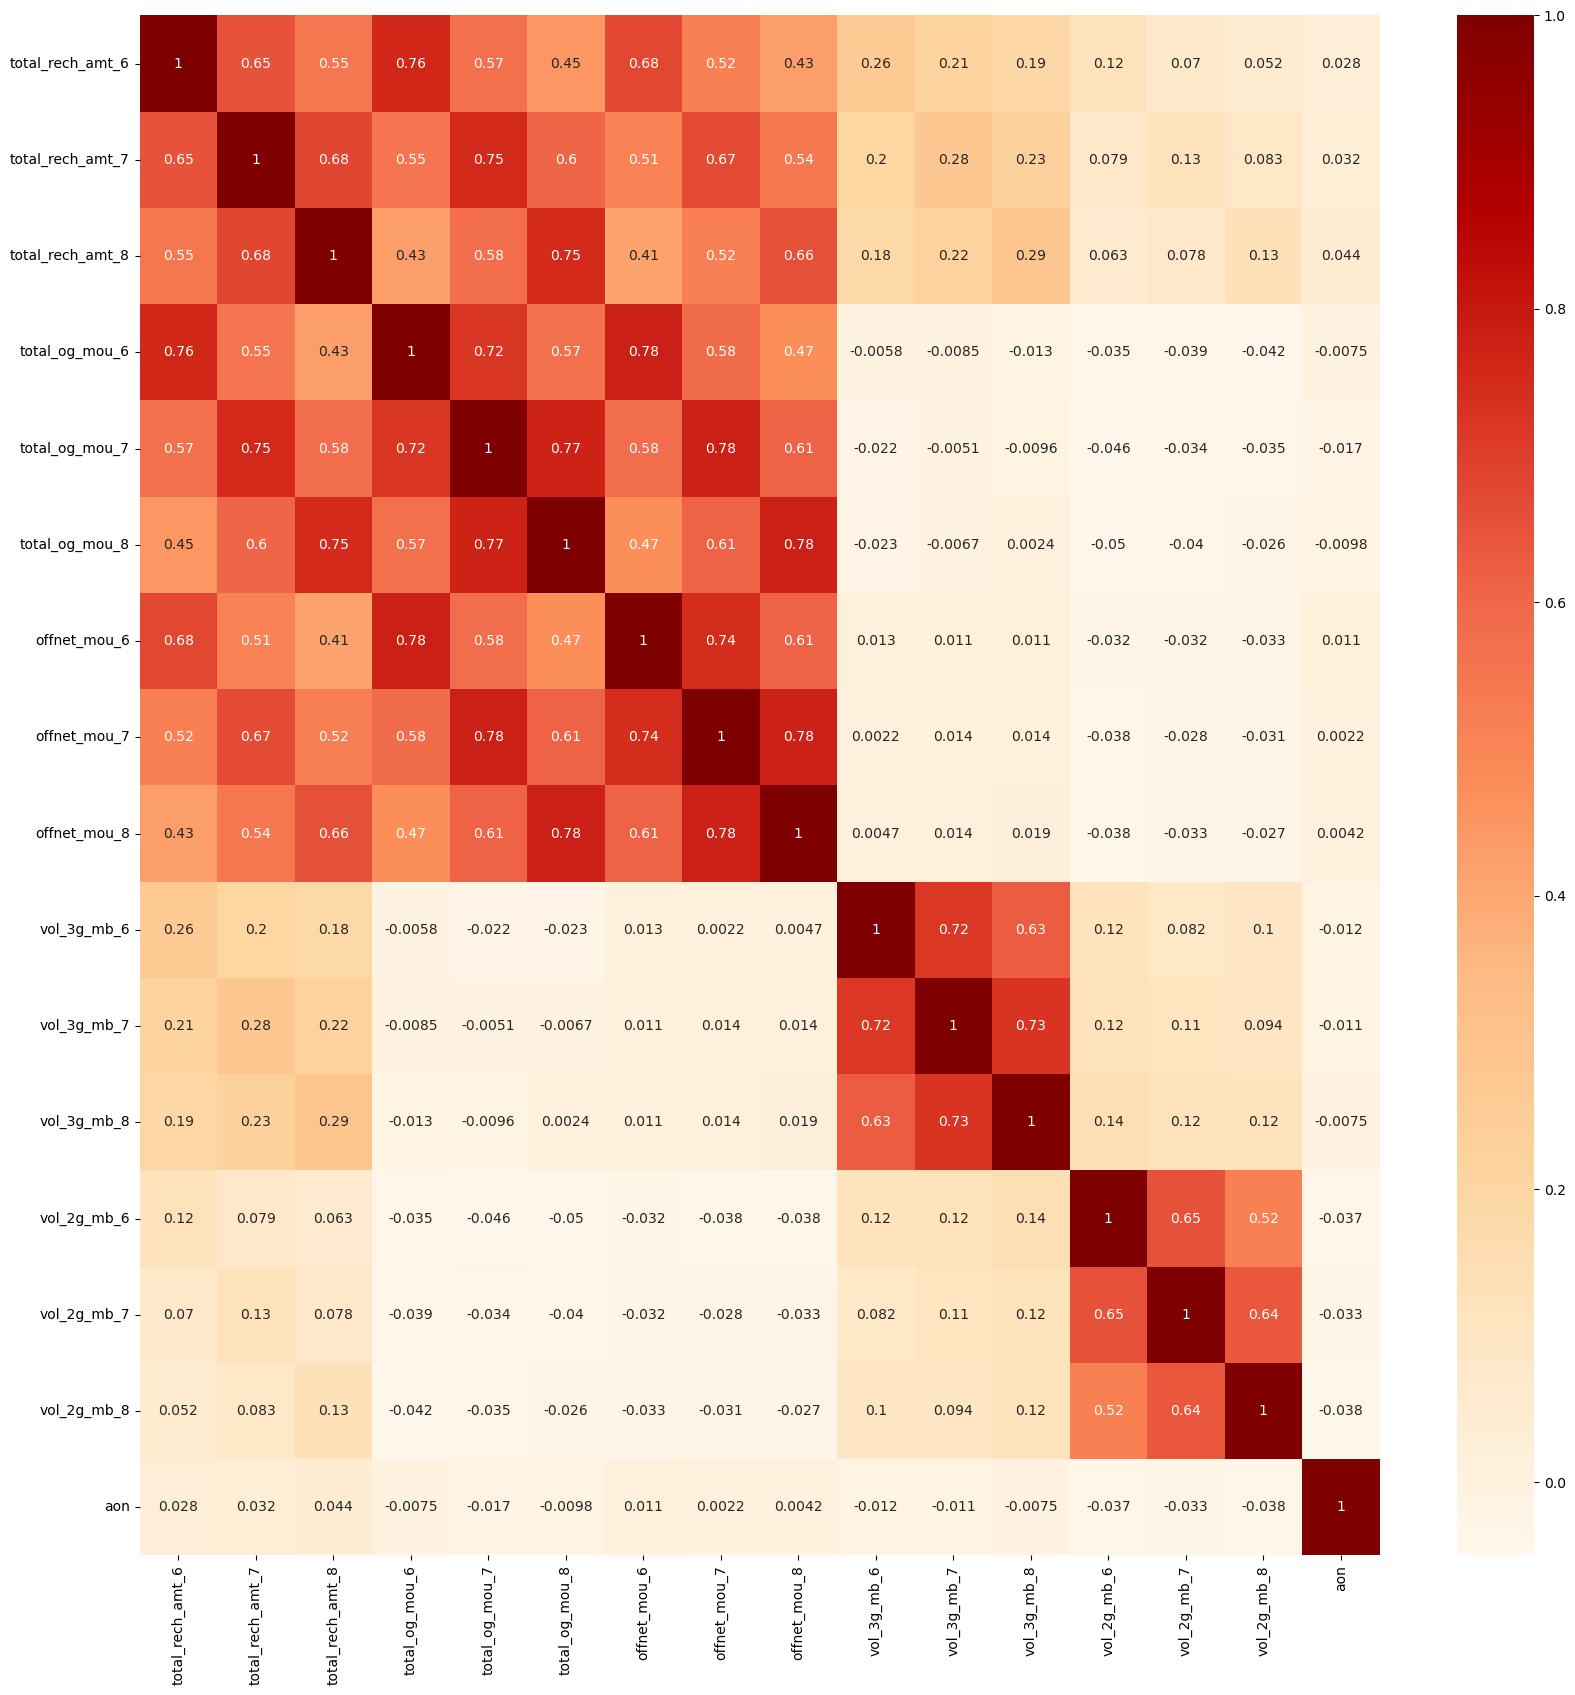

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(telecom[num_vars].corr(),cmap='OrRd',annot =True)
plt.show()

## Partitioning Data: 

Splitting into Training and Testing Sets

In [19]:
X = telecom.drop(['churn_probability'], axis=1)
y = telecom['churn_probability']
# X_train, X_test, y_train, y_test split to build model and test on the dataset, after good build we will predict on test dataset which give in different file.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

## Implementing Decision Trees: 

Applying the Model with <b>Default Parameters</b>

In [20]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8992142857142857


<b> accuracy scrore is 90%, lets try with hyper-parameter tuning </b>

## Optimizing Decision Tree Performance: 

Fine-Tuning Hyperparameters for Improved Model Performance

In [22]:
params = {
    "max_depth": [6,7,8],
    "min_samples_leaf": [120,130,140],
    "criterion": ['gini','entropy']
}

dt_hyp = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_hyp,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

In [23]:
%%time
grid_search.fit(X_train, y_train)
grid_search.best_score_

Fitting 4 folds for each of 18 candidates, totalling 72 fits
CPU times: total: 8.81 s
Wall time: 1min 5s


0.9361596070637699

In [24]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=7, min_samples_leaf=140, random_state=42)

In [25]:
y_pred = dt_best.predict(X_test)
dt_best_acc = accuracy_score(y_pred, y_test)
dt_best_acc

0.9402142857142857

<b>Achieved 94.02% Accuracy After Hyperparameter Tuning</b>

## Implementing Random Forest: 

Applying the Model with <b>Default Parameters</b>

In [26]:
rf = RandomForestClassifier(n_estimators=10, oob_score=True)
rf.fit(X_train, y_train)
rf.oob_score_

0.9233914891337345

## Optimizing Random Forest Performance: 

Fine-Tuning Hyperparameters for Improved Model Performance

In [27]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [9,10,11],
    'min_samples_leaf': [31,33,35],
    'n_estimators': [9,10,11],
    'max_features': [10,12,15]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

In [28]:
%%time
grid_search.fit(X_train, y_train)
grid_search.best_score_

Fitting 4 folds for each of 81 candidates, totalling 324 fits
CPU times: total: 42.4 s
Wall time: 16min 35s


0.9382132167603808

In [29]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=35,
                       n_estimators=9, n_jobs=-1, random_state=42)

In [30]:
y_pred = rf_best.predict(X_test)
rf_best_acc = accuracy_score(y_pred, y_test)
rf_best_acc

0.9424285714285714

<b>Achieved 94.24% Accuracy After Hyperparameter Tuning</b>

## Implementing XGBoost Algorithm for Enhanced Predictive Performance:

Applying the Model with <b>Default Parameters</b>

In [31]:
xgb_cl = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic')
xgb_cl.fit(X_train, y_train)
y_pred = xgb_cl.predict(X_test)
accuracy_score(y_pred, y_test)

0.9397857142857143

## Optimizing XGBoost Performance: 

Fine-Tuning Hyperparameters for Improved Model Performance

In [32]:
param_grid = {
    'learning_rate': [0.08,0.09,0.1],
    'n_estimators': [100,130,150],
    'max_depth': [3,4,5],
    'min_child_weight': [0.5,0.6],
    'gamma': [0.1,0.2,0.3],
    'subsample': [0.2,0.3,0.5],
    'colsample_bytree': [0.3,0.4,0.5],
    'reg_alpha': [ 0.1,0.2,0.3],
    'reg_lambda': [0.09,0.1,0.2]
}

xgb_cl_hyp = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic')
random_search = RandomizedSearchCV(estimator=xgb_cl_hyp, param_distributions=param_grid, 
                                   n_iter=50, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_params

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'subsample': 0.5,
 'reg_lambda': 0.1,
 'reg_alpha': 0.1,
 'n_estimators': 130,
 'min_child_weight': 0.5,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [33]:
random_search.best_score_

0.9382846555177121

In [34]:
xgb_cl_best = random_search.best_estimator_
y_pred = xgb_cl_best.predict(X_test)
xgb_best_acc = accuracy_score(y_pred, y_test)
xgb_best_acc

0.9416428571428571

<b>Achieved 94.16% Accuracy After Hyperparameter Tuning</b>

## Visualizing Model Performance: 

Plotting Results for Decision Tree, Random Forest, and XGBoost

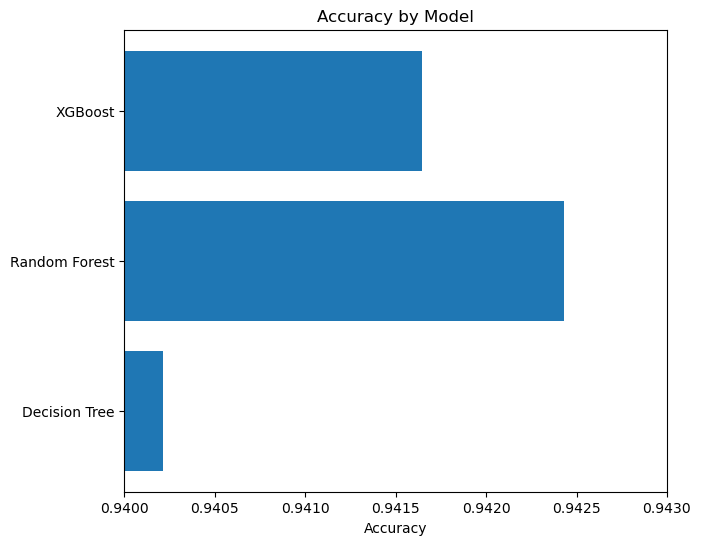

In [35]:
plt.figure(figsize=(7, 6))

plt.barh(['Decision Tree','Random Forest', 'XGBoost'], [dt_best_acc,rf_best_acc,xgb_best_acc])
plt.xlim(0.940, 0.943)
plt.xlabel('Accuracy')
plt.title('Accuracy by Model')

plt.show()

All models are performing approximatly same, however <b>xgboost performed best with 94.14% accuracy</b>, thefore choosing xgboost to predict values from test.csv

#### Replicating Data Preprocessing and Model Building Steps for Test Data (test.csv)

In [36]:
#performing all feature cleanup which were performed during model building
data = pd.read_csv("test.csv")
ids = ['id','circle_id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network]

telecom_test = data[variables].set_index('id')
telecom_test.head()

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_6,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,,,,,,
69999,109,103,90,60,91.94,52.39,57.94,60.16,32.16,34.83,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1692
70000,109,500,500,500,549.86,663.06,415.59,474.34,621.84,394.94,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2533
70001,109,500,1000,1000,0.00,0.00,0.00,16.98,45.81,45.04,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,277
70002,109,110,260,0,45.36,207.18,24.01,40.04,205.01,24.01,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1244
70003,109,356,490,546,514.79,638.28,779.78,60.94,23.84,74.16,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,462


In [37]:
telecom_test.drop(['circle_id','arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8','arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8' ], axis=1, inplace=True)
round(100*(telecom_test.isnull().sum()/len(telecom_test.index)), 2)

total_rech_amt_6    0.00
total_rech_amt_7    0.00
total_rech_amt_8    0.00
total_og_mou_6      0.00
total_og_mou_7      0.00
total_og_mou_8      0.00
offnet_mou_6        3.90
offnet_mou_7        3.91
offnet_mou_8        5.58
vol_3g_mb_6         0.00
vol_3g_mb_7         0.00
vol_3g_mb_8         0.00
vol_2g_mb_6         0.00
vol_2g_mb_7         0.00
vol_2g_mb_8         0.00
aon                 0.00
dtype: float64

In [38]:
#filling null values with mean values
for col in telecom_test.columns:
    telecom_test[col].fillna(telecom_test[col].mean(), inplace=True)

round(100*(telecom_test.isnull().sum()/len(telecom_test.index)), 2)

total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
total_og_mou_8      0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
vol_3g_mb_6         0.0
vol_3g_mb_7         0.0
vol_3g_mb_8         0.0
vol_2g_mb_6         0.0
vol_2g_mb_7         0.0
vol_2g_mb_8         0.0
aon                 0.0
dtype: float64

In [39]:
telecom_test.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,
69999,103,90,60,91.94,52.39,57.94,60.16,32.16,34.83,0.0,0.0,0.0,0.0,0.0,0.0,1692
70000,500,500,500,549.86,663.06,415.59,474.34,621.84,394.94,0.0,0.0,0.0,0.0,0.0,0.0,2533
70001,500,1000,1000,0.00,0.00,0.00,16.98,45.81,45.04,0.0,0.0,0.0,0.0,0.0,0.0,277
70002,110,260,0,45.36,207.18,24.01,40.04,205.01,24.01,0.0,0.0,0.0,0.0,0.0,0.0,1244
70003,356,490,546,514.79,638.28,779.78,60.94,23.84,74.16,0.0,0.0,0.0,0.0,0.0,0.0,462


In [40]:
#scalling data using minmax scaler
scaler = MinMaxScaler()
telecom_test[num_vars]=scaler.fit_transform(telecom_test[num_vars])
telecom_test.describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_amt_6,30000.0,0.017625,0.020713,0.0,0.005622,0.012432,0.023581,1.0
total_rech_amt_7,30000.0,0.017070,0.021112,0.0,0.005263,0.011579,0.022421,1.0
total_rech_amt_8,30000.0,0.023206,0.028081,0.0,0.006429,0.016071,0.030857,1.0
total_og_mou_6,30000.0,0.040888,0.062066,0.0,0.006039,0.019609,0.050171,1.0
total_og_mou_7,30000.0,0.027226,0.042421,0.0,0.003812,0.012510,0.033132,1.0
total_og_mou_8,30000.0,0.021895,0.034564,0.0,0.002754,0.010071,0.026567,1.0
offnet_mou_6,30000.0,0.028114,0.044623,0.0,0.005222,0.014736,0.031620,1.0
offnet_mou_7,30000.0,0.020357,0.033831,0.0,0.003506,0.010175,0.022440,1.0
offnet_mou_8,30000.0,0.014515,0.023975,0.0,0.002564,0.007566,0.015777,1.0
vol_3g_mb_6,30000.0,0.004458,0.019333,0.0,0.000000,0.000000,0.000000,1.0


## Applying Hyper-Tuned Random Forest for Test Dataset Prediction

In [41]:
#predicting values from the test dataset
y_pred = rf_best.predict(telecom_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Exporting Predictions to sample.csv File

In [42]:
summary = pd.read_csv("sample.csv")
summary['churn_probability']=y_pred

In [43]:
summary.to_csv('sample.csv', index=False)